<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
2. Jelaskan beberapa cara imputing missing value?
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:

1. Sebuah proses untuk mengolah data agar dapat menjadi data yang akan menghasilkan model Machine Learning dengan kinerja optimal.

2. Mengganti nilai NaN atau nilai apapun yang tidak memiliki makna pada sebuah data dengan nilai yang diinginkan, misal mean, data sebelumnya atau data sesudahnya, atau membuang data.

3. Scaling dan Cenetering digunakan ketika fitur memiliki pengaruh yang berbeda untuk setiap kolomnnya, sehingg fitur memiliki pengaruh yang sama.

4. Data Sciece Workflow adalah proses kerja untuk memperoleh data yang baik untuk dapat dianalisis atau digunakan sebagai dataset ML atau DL, dimulasi dari mendapatkan data, mengecek, memproses, menganalisis, dan memvisualisasikan.


<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![image.png](attachment:image.png)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Potong = df.loc[:,'Survived':'Parch']

In [ ]:
Potong

Potong = Potong.dropna()
Potong = Potong.reset_index(drop=True)

In [ ]:
data_jadi = Potong.drop('Name',axis = 1)
data_jadi

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
709,0,3,female,39.0,0,5
710,0,2,male,27.0,0,0
711,1,1,female,19.0,0,0
712,1,1,male,26.0,0,0


In [ ]:
prepar = data_jadi.groupby('Survived').mean()
preparo = prepar.loc[:,'Pclass':'Parch']
preparo

,Pclass,Age,SibSp,Parch
Survived,,,,
0,2.485849,30.626179,0.525943,0.365566
1,1.872414,28.343690,0.493103,0.527586


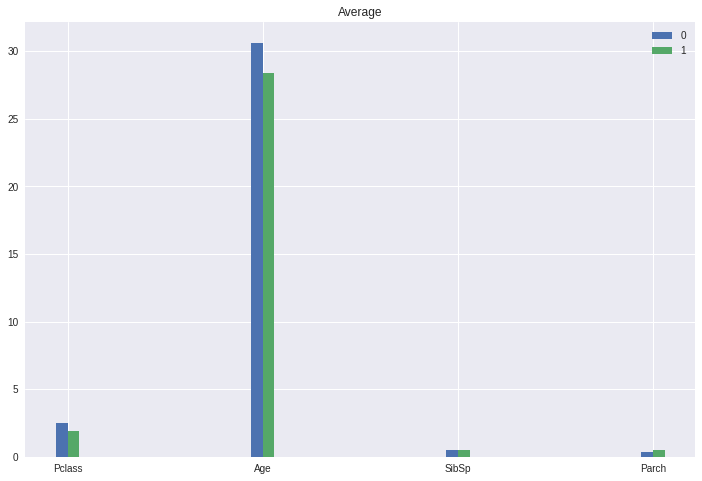

In [ ]:
import numpy as np
plt.style.use('seaborn')


x = np.arange(0,20,5)
y = []
for i in range(preparo.shape[0]):
  y.append(preparo.iloc[i,:])
# y2 = preparo['EU_Sales']
# y3 = preparo['JP_Sales']
# y4 = preparo['Other_Sales']

figur, af = plt.subplots(figsize=(12,8))
jarak = 0
a=list(preparo.index)
for i in range(preparo.shape[0]):
  jarak = jarak+0.3
  af.bar(x+jarak, y[i], width=0.3,label=a[i] )

af.set_xticks(x+0.45)
af.set_title('Average')
af.set_xticklabels( list(preparo.columns))
plt.legend()
plt.show()

In [ ]:
y

[Survived
 0    2.485849
 1    1.872414
 Name: Pclass, dtype: float64, Survived
 0    30.626179
 1    28.343690
 Name: Age, dtype: float64, Survived
 0    0.525943
 1    0.493103
 Name: SibSp, dtype: float64, Survived
 0    0.365566
 1    0.527586
 Name: Parch, dtype: float64]

In [ ]:
data_siap = pd.get_dummies(data_jadi, columns=['Sex'])

In [ ]:
data_siap

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1
...,...,...,...,...,...,...,...
709,0,3,39.0,0,5,1,0
710,0,2,27.0,0,0,0,1
711,1,1,19.0,0,0,1,0
712,1,1,26.0,0,0,0,1


In [ ]:
data_siap.shape[1]

7

In [ ]:
x = data_siap.drop('Survived',axis = 1)
y = data_siap['Survived']

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=14)
modell = KNeighborsClassifier()
parameter = {'n_neighbors' : np.arange(5,500,5), 'weights' : ['distance', 'uniform'] }
gg = GridSearchCV(modell, param_grid=parameter, scoring = 'accuracy', cv = 35)
gg.fit(x_train,y_train)


GridSearchCV(cv=35, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125, 130,
       135, 140, 145, 150, 155, 1...
       200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260,
       265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325,
       330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390,
       395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455,
       460, 465, 470, 475, 480, 485, 490, 495]),
                

In [ ]:
gg.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
gg.best_score_

0.7941666666666668

In [ ]:
modell = KNeighborsClassifier(n_neighbors = 5, weights ='uniform')
modell.fit(x_train,y_train)
y_pred = modell.predict_proba(x_test)
y_pred

array([[0.8, 0.2],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.6, 0.4],
       [1. , 0. ],
       [0. , 1. ],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0. ,

In [ ]:
modell.classes_

array([0, 1])

In [ ]:
pd.DataFrame(y_pred)
Predicted = {'Death': y_pred[:,0], 'Life': y_pred[:,1] }

In [ ]:
hasil = pd.DataFrame(y_pred)
hasil.columns = ['Deaths','Life']

In [ ]:
hasil

,Deaths,Life
0,0.8,0.2
1,0.0,1.0
2,0.2,0.8
3,0.6,0.4
4,0.6,0.4
...,...,...
174,0.4,0.6
175,0.6,0.4
176,0.2,0.8
177,0.6,0.4


In [ ]:
hasil.to_csv('citrayaf@gmail.com.csv')
